In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [10]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [26]:
df = pd.read_csv(r"train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [27]:
df.shape

(20800, 5)

In [28]:
pd.reset_option('all')

<ipython-input-28-056908e7e3ef>:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
<ipython-input-28-056908e7e3ef>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [29]:
df.title

,title
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...
...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,Macy’s Is Said to Receive Takeover Approach by...
20798,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [30]:
df['text']

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
...,...
20795,Rapper T. I. unloaded on black celebrities who...
20796,When the Green Bay Packers lost to the Washing...
20797,The Macy’s of today grew from the union of sev...
20798,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [31]:
df.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [32]:
df.dropna(inplace = True)
df.reset_index(inplace = True)

In [33]:
df['label'].value_counts()

,count
label,
0,10361
1,7924


In [34]:
df.isnull().sum()

,0
index,0
id,0
title,0
author,0
text,0
label,0


In [35]:
import re
import string

In [36]:
alphanumeric = lambda x: re.sub('\w*\d\w*',' ',x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower())
remove_n = lambda x: re.sub('\n',' ',x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ',x)
df.text =df.text.map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
print("HELLO")
for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    print(i)

Streaming output truncated to the last 5000 lines.
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
13412
13413
13414
13415
13416
13417
13418
13419
13420
13421
13422
13423
13424
13425
13426
13427
13428
13429
13430
13431
13432
13433
13434
13435
13436
13437
13438
13439
13440
13441
13442
1

In [38]:
X = df['text']

In [39]:
y = df['label']

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [41]:
tfidvect = TfidfVectorizer(stop_words = 'english',max_df = 0.7)
tfid_train = tfidvect.fit_transform(X_train)
tfid_test = tfidvect.transform(X_test)

In [ ]:
print(tfid_test)

  (0, 358)	0.07961279856449366
  (0, 372)	0.03030340879173823
  (0, 537)	0.04496190882795737
  (0, 633)	0.07075978034731972
  (0, 736)	0.11319225510688784
  (0, 1060)	0.05356680934216195
  (0, 1920)	0.028721303324107054
  (0, 2073)	0.0542230376341789
  (0, 3628)	0.04619571383849755
  (0, 3955)	0.17924010444532165
  (0, 4547)	0.05023249852719462
  (0, 5244)	0.12749615200769782
  (0, 5725)	0.04875118763319373
  (0, 5728)	0.06274037776972732
  (0, 5926)	0.08279815274318891
  (0, 7017)	0.04500002737007027
  (0, 7485)	0.07961279856449366
  (0, 7690)	0.10316276615503131
  (0, 7703)	0.057687204737496826
  (0, 8095)	0.03273305183986614
  (0, 10690)	0.0390269903337603
  (0, 10935)	0.053077230442367646
  (0, 10975)	0.07212730718170765
  (0, 11390)	0.042947324110644544
  (0, 11530)	0.08616655830482718
  :	:
  (1499, 59824)	0.019900454713967654
  (1499, 59958)	0.020896045747381107
  (1499, 60033)	0.022118199913117056
  (1499, 60056)	0.012952812146981655
  (1499, 60066)	0.0336916403984266
  (1499, 

In [42]:
print(tfidvect.get_feature_names_out()[-10:])

['zwrotu' 'zwyci' 'zy' 'zyaira' 'zygankow' 'zylinderkopfdichtung' 'zynga'
 'zytsov' 'zyuganov' 'zzzzs']


In [43]:
countvect = CountVectorizer(stop_words='english')
count_train = countvect.fit_transform(X_train.values)
count_test = countvect.transform(X_test.values)

In [44]:
print(count_test)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 1397914 stored elements and shape (5486, 116917)>
  Coords	Values
  (0, 608)	1
  (0, 610)	1
  (0, 617)	1
  (0, 649)	1
  (0, 739)	2
  (0, 742)	1
  (0, 743)	1
  (0, 964)	1
  (0, 1325)	2
  (0, 1359)	1
  (0, 1839)	2
  (0, 1845)	1
  (0, 1884)	1
  (0, 2105)	1
  (0, 2880)	2
  (0, 2882)	1
  (0, 2883)	1
  (0, 3481)	4
  (0, 3485)	7
  (0, 3499)	1
  (0, 4437)	3
  (0, 4731)	1
  (0, 4883)	1
  (0, 4887)	1
  (0, 5384)	1
  :	:
  (5485, 96848)	5
  (5485, 97650)	1
  (5485, 98159)	2
  (5485, 98435)	1
  (5485, 99123)	1
  (5485, 103967)	1
  (5485, 104271)	1
  (5485, 104377)	3
  (5485, 104982)	1
  (5485, 105466)	2
  (5485, 105699)	1
  (5485, 106478)	4
  (5485, 106574)	1
  (5485, 106600)	1
  (5485, 107849)	1
  (5485, 108456)	1
  (5485, 109805)	1
  (5485, 111446)	1
  (5485, 112423)	1
  (5485, 112605)	2
  (5485, 113875)	1
  (5485, 114130)	1
  (5485, 114669)	1
  (5485, 114803)	1
  (5485, 115553)	1


In [45]:
print(countvect.get_feature_names_out()[:10])

['aa' 'aaa' 'aaaaah' 'aaaaggg' 'aaah' 'aaahhh' 'aaany' 'aab' 'aabb'
 'aachen']


Training the model
===

Naive Bayes
----

Tf-idf Vectorize
-

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
model = MultinomialNB()
model.fit(tfid_train,y_train)
pred = model.predict(tfid_test)

In [48]:
accuracy_score(y_test,pred)

0.7876412686839227

In [49]:
cf = confusion_matrix(y_test,pred)

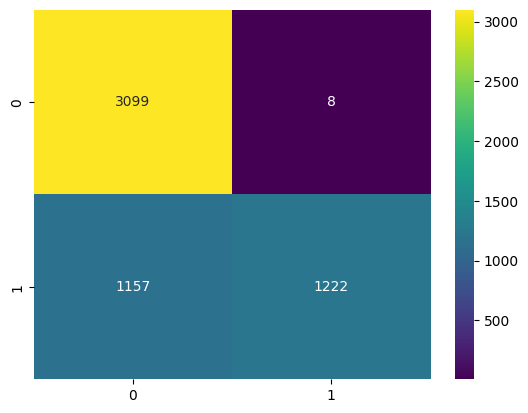

In [50]:
sns.heatmap(cf,annot = True,fmt='d',cmap = 'viridis')
plt.show()

Count Vectorizer
-

In [51]:
model = MultinomialNB()
model.fit(count_train,y_train)
pred = model.predict(count_test)

In [52]:
model.score(count_test,y_test)

0.9039372949325556

In [53]:
cf = confusion_matrix(pred,y_test)

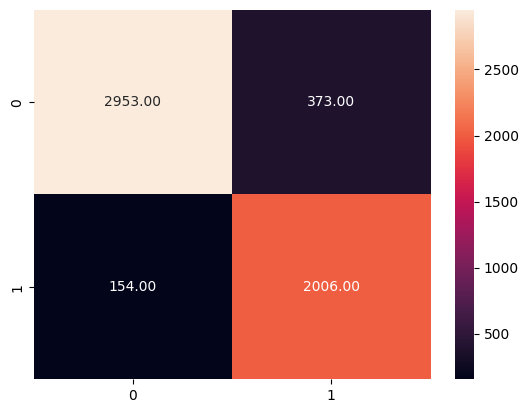

In [54]:
sns.heatmap(cf,annot = True, fmt = '.2f')
plt.show()

Random Forest
---

Tf-idf Vectorizer
-

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model = RandomForestClassifier()
model.fit(tfid_train,y_train)
pred = model.predict(tfid_test)
model.score(tfid_test,y_test)

0.9161502005103901

In [57]:
cf = confusion_matrix(pred,y_test)

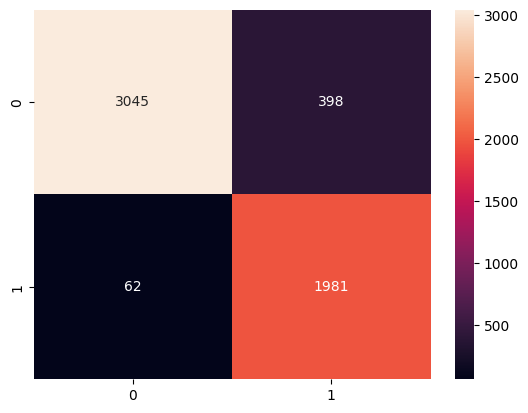

In [58]:
sns.heatmap(cf,annot =True, fmt ='d')
plt.show()

Count Vectorizer
-

In [59]:
model = RandomForestClassifier()
model.fit(count_train,y_train)
pred = model.predict(count_test)
model.score(count_test,y_test)

0.9108640174990886

In [60]:
cf = confusion_matrix(pred,y_test)

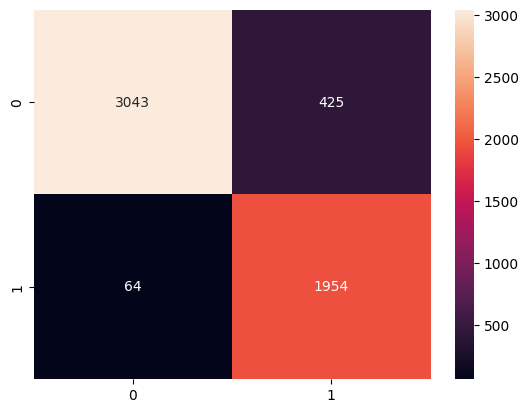

In [61]:
sns.heatmap(cf,annot = True, fmt= 'd')
plt.show()

K-Nearest Neighbours
---

Tf-idf Vectorize
-

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model = KNeighborsClassifier().fit(tfid_train,y_train)
pred = model.predict(tfid_test)
model.score(tfid_test,y_test)

0.492344148742253

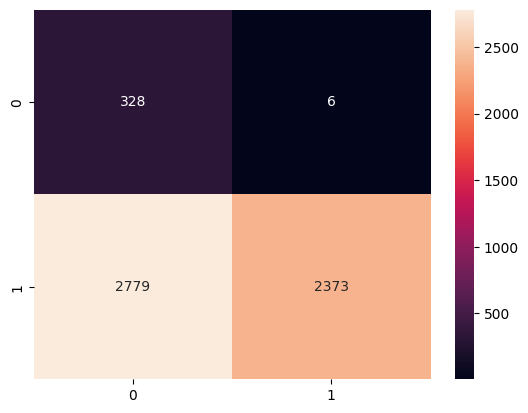

In [64]:
cf = confusion_matrix(pred,y_test)
sns.heatmap(cf,annot = True, fmt = 'd')
plt.show()

Count Vetorize
-

In [65]:
model = KNeighborsClassifier().fit(count_train,y_train)
pred = model.predict(count_test)
model.score(count_test,y_test)

0.7382427998541743

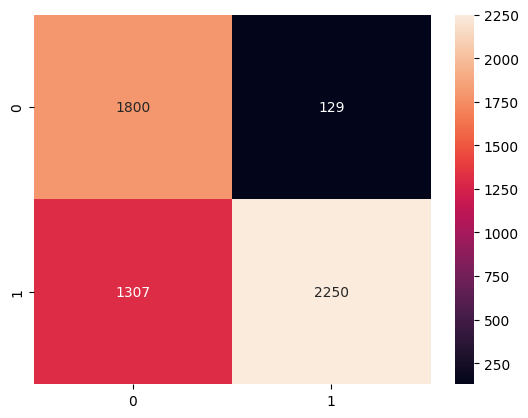

In [66]:
cf = confusion_matrix(pred,y_test)
sns.heatmap(cf, annot = True, fmt = 'd')
plt.show()